# Shared Bike Assignment :

## Understanding data -


### Importing all libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
day = pd.read_csv("day.csv")

In [4]:
#Checking dataset

day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
day.shape

(730, 16)

In [6]:
day.info()
day.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
day.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Note: 

* There are about 730 rows and 16 columns
* There are no Null values in the dataset.
* Need to change some int/float column type to Catergorical as they are categorical in nature.


## Removing few independent variable columns for ease in analysis-

In [8]:
 #Because cnt is our dependent variable, 'casual' and 'registered' are redundant columns. We need to drop the same.
day.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
day.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Visualizing Data and checking Multicollinearity 

In [9]:
sns.pairplot(data=day, vars=['temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualizing the data using pairplot for numeric variables

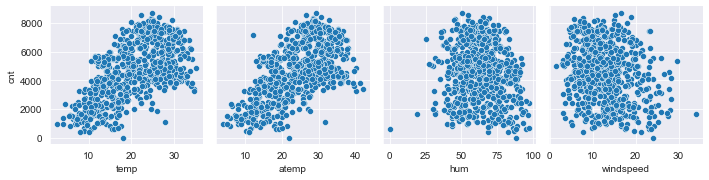

In [10]:
sns.pairplot(data=day,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

### Note:

* There is linear relationship between temp and atemp.
* There is some positive linear trend between temp-cnt and atemp-cnt

#### #Visualizing the data using boxplots for categorical variables

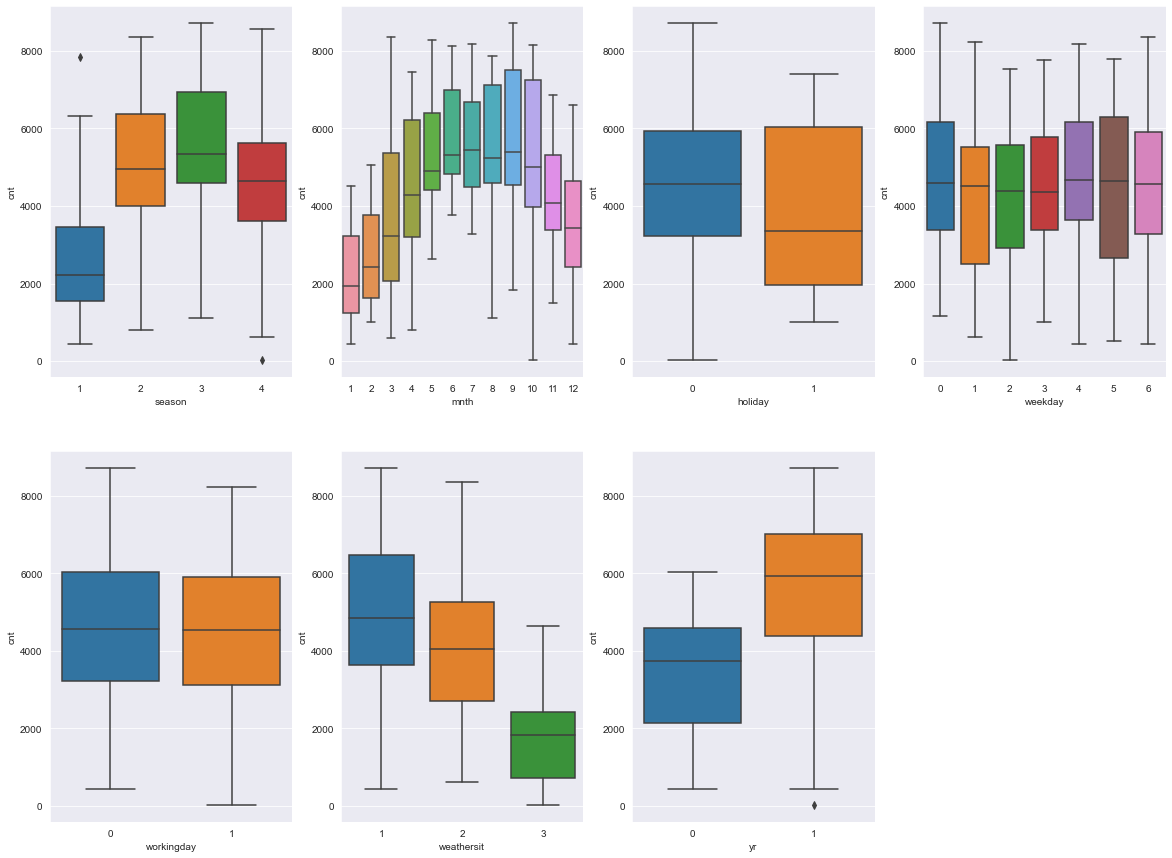

In [11]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = day)

plt.show()

### NOTE:

* Bike demands are more in Summers and falls when their are no Holidays
* Bike demands in 2019 was more than 2018 potraying increase in customers.
* Bike demands are lower when its raining/snowing i.e. weather plays role in amount of booking.
* Most of the bike bookings were on Working days than Holidays.

## Data Preparation

In [12]:
# Converting some numerical variables into categorical to gain better insights and meaning from the data

day['season'] = day['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
day['weekday'] = day['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
day['weathersit'] = day['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
day['mnth'] = day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
# Creating dummy Variables
# Converting the season, mnth, weekday and weathersit to non-numerical categories.

day['season'] = day['season'].astype('category')
day['mnth'] = day['mnth'].astype('category')
day['weekday'] = day['weekday'].astype('category')
day['weathersit'] = day['weathersit'].astype('category')


In [14]:
day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [15]:
day.head()


season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  Spring   0  Jan        0     Monday           1  Mist & Cloudy  14.110847   
1  Spring   0  Jan        0    Tuesday           1  Mist & Cloudy  14.902598   
2  Spring   0  Jan        0  Wednesday           1          Clear   8.050924   
3  Spring   0  Jan        0   Thrusday           1          Clear   8.200000   
4  Spring   0  Jan        0     Friday           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Creating Dummy Variables

In [16]:
# dropping 1st dummy variable for each and the original columns

day=pd.get_dummies(data=day,drop_first=True)

day.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0              1              0  ...         0         0               1   
1              1              0  ...         0         0               0   
2              1              0  ...         0         0               0   
3              1              0  ...         0         0               0   
4              1              0  ...         0         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
0                 0               0                 0                0   
1                 0               0                 0                1   
2                 0               0                 0                0   
3                 0               0                 1                0   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light Snow & Rain  weathersit_Mist & Cloudy  
0                  0                             0                         1  
1                  0                             0                         1  
2                  1                             0                         0  
3                  0                             0                         0  
4                  0                             0                         0  

[5 rows x 30 columns]

In [17]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_Spring                 730 non-null    uint8  
 9   season_Summer                 730 non-null    uint8  
 10  season_Winter                 730 non-null    uint8  
 11  mnth_Aug                      730 non-null    uint8  
 12  mnth_Dec                      730 non-null    uint8  
 13  mnth_

In [18]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

##  Splitting Data for Train and Test Sets (70:30 Ratio)


In [19]:
np.random.seed(0)
day_train, day_test = train_test_split (day ,train_size=0.7 ,test_size=0.3 ,random_state=100 )

In [20]:
print(day_train.shape)
print(day_test.shape)

(510, 30)
(219, 30)


In [21]:
day_train.info()
day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            510 non-null    int64  
 1   holiday                       510 non-null    int64  
 2   workingday                    510 non-null    int64  
 3   temp                          510 non-null    float64
 4   atemp                         510 non-null    float64
 5   hum                           510 non-null    float64
 6   windspeed                     510 non-null    float64
 7   cnt                           510 non-null    int64  
 8   season_Spring                 510 non-null    uint8  
 9   season_Summer                 510 non-null    uint8  
 10  season_Winter                 510 non-null    uint8  
 11  mnth_Aug                      510 non-null    uint8  
 12  mnth_Dec                      510 non-null    uint8  
 13  mnth

In [22]:
day_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653   1        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           1  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
653              0              0  ...         1         0               0   
576              0              0  ...         0         0               0   
426              1              0  ...         0         0               0   
728              1              0  ...         0         0               1   
482              0              1  ...         0         0               0   

     weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
653                 0               0                 0                0   
576                 0               0                 0                0   
426                 0               1                 0                0   
728                 0               0                 0                0   
482                 0               1                 0                0   

     weekday_Wednesday  weathersit_Light Snow & Rain  weathersit_Mist & Cloudy  
653                  1                             0                         0  
576                  1                             0                         0  
426                  0                             0                         1  
728                  0                             0                         0  
482                  0                             0                         1  

[5 rows x 30 columns]

## Rescaling Data for better understanding

In [23]:
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all numeric variables except the 'dummy' variables
n=['atemp', 'hum','temp','windspeed','cnt']

day_train[n]=scaler.fit_transform(day_train[n])

In [25]:
day_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  \
653  0.864243              0              0  ...         1         0   
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
653               0                 0               0                 0   
576               0                 0               0                 0   
426               0                 0               1                 0   
728               1                 0               0                 0   
482               0                 0               1                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_Light Snow & Rain  \
653                0                  1                             0   
576                0                  1                             0   
426                0                  0                             0   
728                0                  0                             0   
482                0                  0                             0   

     weathersit_Mist & Cloudy  
653                         0  
576                         0  
426                         1  
728                         0  
482                         1  

[5 rows x 30 columns]

In [26]:
day_train.shape

(510, 30)

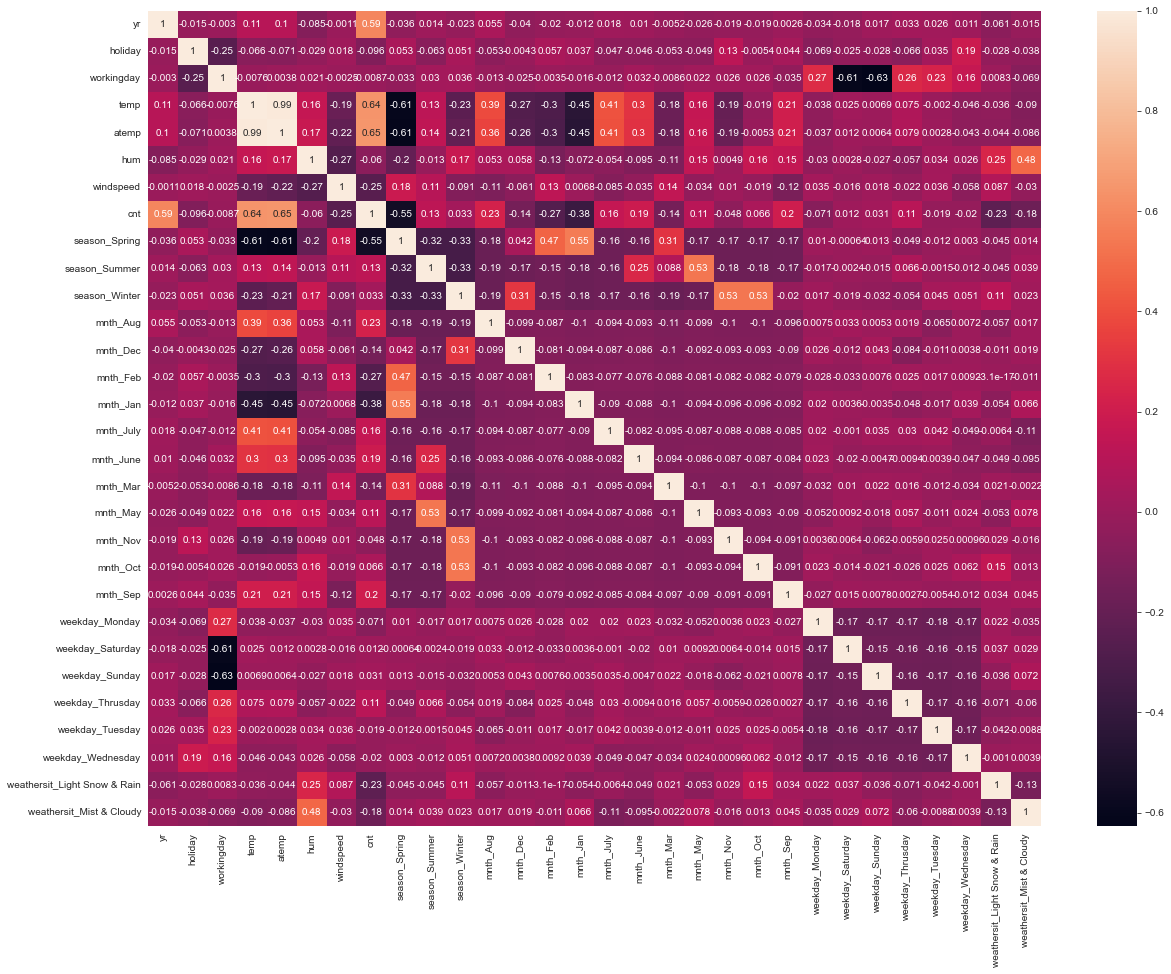

In [27]:
plt.figure(figsize = (20, 15))
sns.heatmap(day_train.corr(), annot = True)
plt.show()

# Dividing the training data into X and y to build the model

In [ ]:
# Dividing into X and Y sets for the model building
y_train = day_train.pop('cnt')
X_train = day_train

In [38]:
# Creating Linear Regression Model
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
# Calculating RFE for 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Columns selected by RFE
C = X_train.columns[rfe.support_]
C

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [42]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[C]

## Creating VIFs for the model

In [44]:
#Building a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

#Creating the model
lr = sm.OLS(y_train,X_train_sm)

#Fitting the model
lr_model = lr.fit()

#Printing Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        23:40:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

From above summary we can infer that about 85% of data is being used in the Model.
Now we will check VIF Values of Independent Variables.

In [ ]:
X_train_1 = X_train_rfe.drop(['const'], axis=1)

V = pd.DataFrame()
X = X_train_rfe
V['Variables'] = X.columns
V['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
V['VIF'] = round(V['VIF'], 2)
V = V.sort_values(by = "VIF", ascending = False)
V
V

In [ ]:
#As humidity is high in new model dropping column.
X_train_1 = X_train_1.drop(['hum'], axis=1)

### Final Model

In [64]:
 X_train_2 = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_2).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        23:48:33   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2466      0.032      7.679      0.000       0.184       0.310
yr                               0.2343      0.008     28.709      0.000       0.218       0.250
holiday                         -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                             0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                       -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring                   -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                    0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                    0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec                        -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                        -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                       -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                        -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep                         0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light Snow & Rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist & Cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## VIF for the new model

In [66]:
v = pd.DataFrame()
X = X_train_1
v['variables'] = X.columns
v['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
v['VIF'] = round(v['VIF'], 2)
v = v.sort_values(by = "VIF", ascending = False)
v

variables   VIF
2                           temp  5.17
3                      windspeed  4.67
6                  season_Winter  2.94
4                  season_Spring  2.89
5                  season_Summer  2.23
0                             yr  2.07
10                      mnth_Nov  1.80
8                       mnth_Jan  1.66
9                      mnth_July  1.59
13      weathersit_Mist & Cloudy  1.56
7                       mnth_Dec  1.46
11                      mnth_Sep  1.35
12  weathersit_Light Snow & Rain  1.09
1                        holiday  1.06

##  Residual analysis

In [67]:
y_train_2 = lm.predict(X_train_2)

Text(0.5, 0, 'Error')

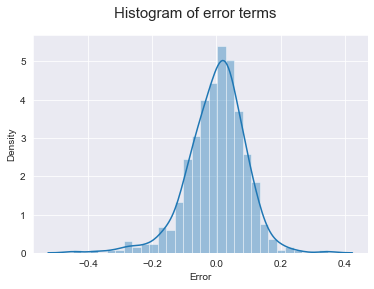

In [68]:
# Plot the histogram
fig = plt.figure()
sns.distplot((y_train - y_train_2), bins = 30)
fig.suptitle('Histogram of error terms', fontsize = 15)
plt.xlabel('Error', fontsize = 10)                        

# Making Prediction using the Final model and the Test set - 

In [70]:
#Scaling the terms on test set

n = ['cnt','hum','windspeed','temp','atemp']
day_test[n] = scaler.transform(day_test[n])
day_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.576961    0.000260    0.638508   
std      0.500722    0.188034    0.481313    0.246733    0.000955    0.148974   
min      0.000000    0.000000    0.000000    0.036034   -0.001962    0.261915   
25%      0.000000    0.000000    0.000000    0.361275   -0.000565    0.527265   
50%      0.000000    0.000000    1.000000    0.576697    0.000331    0.627737   
75%      1.000000    0.000000    1.000000    0.788281    0.001053    0.743928   
max      1.000000    1.000000    1.000000    1.026177    0.002223    1.002146   

        windspeed         cnt  season_Spring  season_Summer  ...    mnth_Oct  \
count  219.000000  219.000000     219.000000     219.000000  ...  219.000000   
mean     0.309257  119.266758       0.255708       0.264840  ...    0.082192   
std      0.151497   49.844259       0.437258       0.442259  ...    0.275286   
min     -0.028085   11.473651       0.000000       0.000000  ...    0.000000   
25%      0.200490   86.622005       0.000000       0.000000  ...    0.000000   
50%      0.296099  120.107324       0.000000       0.000000  ...    0.000000   
75%      0.394216  153.986434       1.000000       1.000000  ...    0.000000   
max      0.777276  220.287628       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
count  219.000000      219.000000        219.000000      219.000000   
mean     0.086758        0.118721          0.173516        0.155251   
std      0.282125        0.324202          0.379560        0.362974   
min      0.000000        0.000000          0.000000        0.000000   
25%      0.000000        0.000000          0.000000        0.000000   
50%      0.000000        0.000000          0.000000        0.000000   
75%      0.000000        0.000000          0.000000        0.000000   
max      1.000000        1.000000          1.000000        1.000000   

       weekday_Thrusday  weekday_Tuesday  weekday_Wednesday  \
count        219.000000       219.000000         219.000000   
mean           0.141553         0.123288           0.155251   
std            0.349389         0.329520           0.362974   
min            0.000000         0.000000           0.000000   
25%            0.000000         0.000000           0.000000   
50%            0.000000         0.000000           0.000000   
75%            0.000000         0.000000           0.000000   
max            1.000000         1.000000           1.000000   

       weathersit_Light Snow & Rain  weathersit_Mist & Cloudy  
count                    219.000000                219.000000  
mean                       0.027397                  0.319635  
std                        0.163612                  0.467403  
min                        0.000000                  0.000000  
25%                        0.000000                  0.000000  
50%                        0.000000                  0.000000  
75%                        0.000000                  1.000000  
max                        1.000000                  1.000000  

[8 rows x 30 columns]

In [ ]:

y_test = day_test.pop('cnt')
X_test = day_test
X_test = sm.add_constant(X_test)
test_col = X_train_2.columns
X_test=X_test[test_col[1:]]
X_test = sm.add_constant(X_test)
X_test.info()

In [75]:
 # Making predictions using the final model

y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

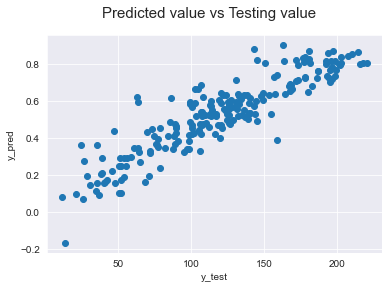

In [81]:
#Plotting the graph for actual vs predicted values

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Predicted value vs Testing value', fontsize = 15)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)  

In [80]:
#Check for the coefficients of the independent variables for the model.

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

Variables  Coefficient
index                                           
3                              temp     0.437655
0                             const     0.246635
1                                yr     0.234287
7                     season_Winter     0.088652
12                         mnth_Sep     0.068219
6                     season_Summer     0.033271
11                         mnth_Nov    -0.041852
8                          mnth_Dec    -0.044529
9                          mnth_Jan    -0.050270
10                        mnth_July    -0.050376
5                     season_Spring    -0.071640
14         weathersit_Mist & Cloudy    -0.081442
2                           holiday    -0.091915
4                         windspeed    -0.158596
13     weathersit_Light Snow & Rain    -0.292892

Note:
    
The best fit line is with R square value of 84%.


